In [1]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages_kmers', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-11 11:40:32	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages_kmers/datapackage.json
2016-01-11 11:40:32	Parsing datapackage to create a Study object
2016-01-11 11:41:06	Initializing Study
2016-01-11 11:41:06	Initializing Predictor configuration manager for Study
2016-01-11 11:41:06	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-11 11:41:06	Added ExtraTreesClassifier to default predictors
2016-01-11 11:41:06	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-11 11:41:06	Added ExtraTreesRegressor to default predictors
2016-01-11 11:41:06	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-11 11:41:06	Added GradientBoostingClassifier to default predictors
2016-01-11 11:41:06	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemb

{'MN': u'#e62a8a', 'NPC': u'#396bb0', 'iPSC': u'#1b9e77', 'sMN': u'#fdc086'}

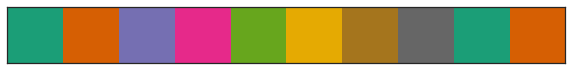

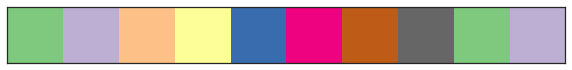

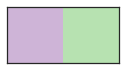

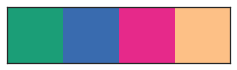

In [2]:
import matplotlib as mpl
dark2 = sns.color_palette('Dark2', n_colors=10)
sns.palplot(dark2)
accent = sns.color_palette('Accent', n_colors=10)
sns.palplot(accent)

sns.palplot(sns.color_palette('PRGn', n_colors=2))

# This is the winner!!
import matplotlib as mpl
celltype_palette = dark2[0], accent[4], dark2[3], accent[2]
sns.palplot(celltype_palette)

celltype_palette = map(mpl.colors.rgb2hex, celltype_palette)

phenotype_to_color = dict(zip(['iPSC', 'NPC', "MN", "sMN"], celltype_palette))
# phenotype_to_color

study.metadata.phenotype_to_color = phenotype_to_color
study.phenotype_to_color

Separate ids for single cells that aren't outliers

In [4]:
singles_not_outliers = study.sample_subset_to_sample_ids('~pooled') & study.sample_subset_to_sample_ids('~outlier')
print singles_not_outliers[:5]

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05'], dtype='object')


In [5]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'
folder_folder = '{}/changing_events'.format(folder)


figure_folder = '{}/kmers'.format(folder)
!mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/kmers': File exists


/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


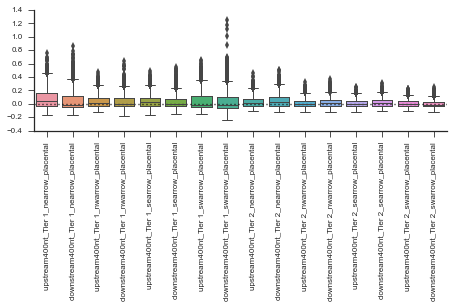

In [6]:
sns.set(style='ticks', context='paper')
fig, ax = plt.subplots()

sns.boxplot(study.supplemental.tier12_kmer_zscores, linewidth=1)
ax.set_xticklabels(study.supplemental.tier12_kmer_zscores.columns, rotation=90);
xmin, xmax = ax.get_xlim()
ax.hlines(0, xmin, xmax, linestyle=':', color='k')
sns.despine()
fig.tight_layout()

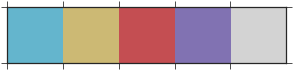

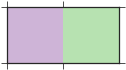

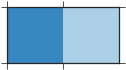

In [7]:
import matplotlib as mpl
from anchor import MODALITY_TO_COLOR

# dark2 = sns.color_palette('Dark2', n_colors=10)
# sns.palplot(dark2)
# accent = sns.color_palette('Accent', n_colors=10)
# sns.palplot(accent)
sns.palplot(MODALITY_PALETTE)

sns.palplot(sns.color_palette('PRGn', n_colors=2))
region_to_color = dict(zip(['upstream', 'downstream'], ['lightgrey', 'darkgrey']))
direction_to_color = {r'nwarrow': MODALITY_TO_COLOR['~1'], r'searrow': MODALITY_TO_COLOR['~0'],
                      r'swarrow': MODALITY_TO_COLOR['middle'], r'nearrow': MODALITY_TO_COLOR['bimodal']}
sequential = map(mpl.colors.rgb2hex, sns.color_palette('Blues_r', n_colors=2))
sns.palplot(sequential)

# tier_to_color = dict(zip(['Tier 1', 'Tier 2'], sequential))

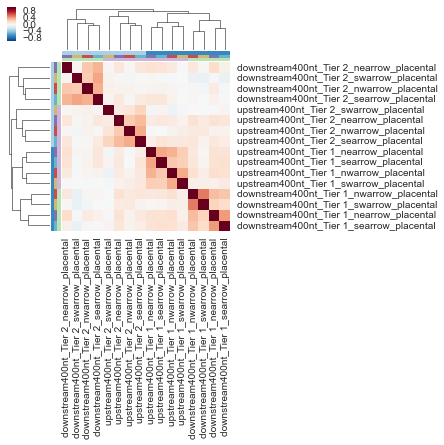

In [19]:
from anchor import MODALITY_TO_COLOR
sns.set(style='whitegrid')

columns = study.supplemental.tier12_kmer_zscores.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

pearson_clustergrid = sns.clustermap(study.supplemental.tier12_kmer_zscores.corr(), figsize=(4, 4), 
               col_colors=intron_colors, row_colors=intron_colors)

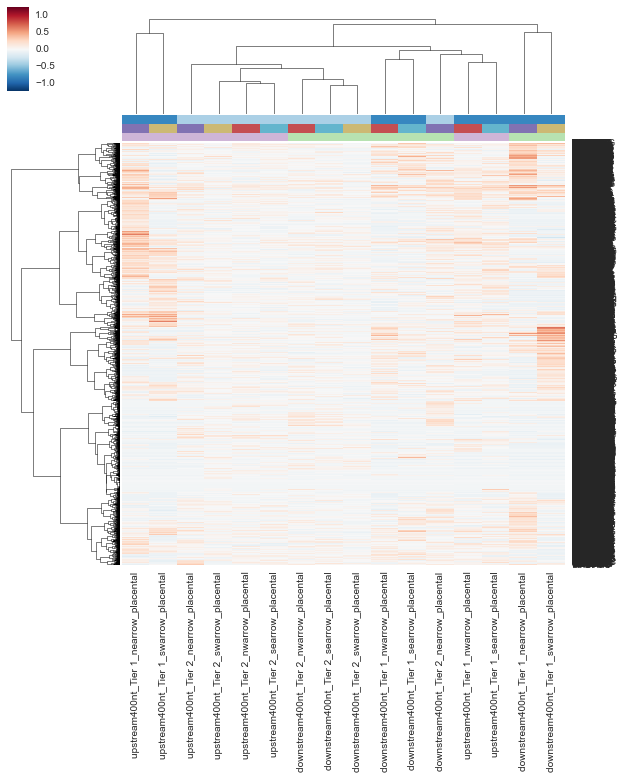

In [24]:
sns.clustermap(study.supplemental.tier12_kmer_zscores, col_colors=intron_colors, metric='euclidean', method='ward')

### Other clustering methods

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, SpectralClustering, AffinityPropagation

In [64]:
sc = SpectralClustering()

In [65]:
clustered = sc.fit_predict(study.supplemental.tier12_kmer_zscores)

In [67]:
clustered

array([1, 6, 6, ..., 1, 3, 0], dtype=int32)

#### PCA on the introns

In [38]:
tier12_kmer_metadata = pd.DataFrame(list(study.supplemental.tier12_kmer_zscores.columns.map(lambda x: x.split('_'))),
                                   index=study.supplemental.tier12_kmer_zscores.columns)
tier12_kmer_metadata = tier12_kmer_metadata.rename(columns={0:'region', 1:'Tier', 2:'direction', 3:'clade'})
tier12_kmer_metadata.head()

,region,Tier,direction,clade
upstream400nt_Tier 1_nearrow_placental,upstream400nt,Tier 1,nearrow,placental
downstream400nt_Tier 1_nearrow_placental,downstream400nt,Tier 1,nearrow,placental
upstream400nt_Tier 1_nwarrow_placental,upstream400nt,Tier 1,nwarrow,placental
downstream400nt_Tier 1_nwarrow_placental,downstream400nt,Tier 1,nwarrow,placental
upstream400nt_Tier 1_searrow_placental,upstream400nt,Tier 1,searrow,placental


In [39]:
study.supplemental.tier12_kmer_metadata = tier12_kmer_metadata

(16, 2)


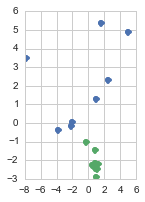

In [48]:

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(study.supplemental.tier12_kmer_zscores.T), 
                       index=study.supplemental.tier12_kmer_zscores.columns)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
print reduced.shape

fig, ax = plt.subplots(figsize=(2, 3))
for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
    ax.plot(df1.iloc[:, 0], df1.iloc[:, 1], 'o', label=group1)

In [49]:
reduced_metadata = reduced.join(tier12_kmer_metadata)
reduced_metadata.head()

,component_0,component_1,region,Tier,direction,clade
upstream400nt_Tier 1_nearrow_placental,-7.773031,3.512678,upstream400nt,Tier 1,nearrow,placental
downstream400nt_Tier 1_nearrow_placental,1.577599,5.384958,downstream400nt,Tier 1,nearrow,placental
upstream400nt_Tier 1_nwarrow_placental,-2.070273,0.030715,upstream400nt,Tier 1,nwarrow,placental
downstream400nt_Tier 1_nwarrow_placental,2.444780,2.324110,downstream400nt,Tier 1,nwarrow,placental
upstream400nt_Tier 1_searrow_placental,-2.130458,-0.159775,upstream400nt,Tier 1,searrow,placental


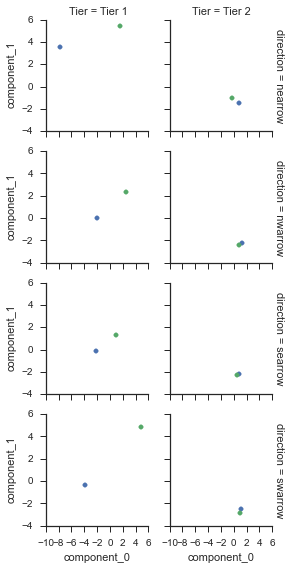

In [54]:
sns.set(style='ticks')
g = sns.FacetGrid(reduced_metadata, sharex=True, sharey=True, margin_titles=True,
                  hue='region', col='Tier', row='direction', size=2)
g.map(plt.scatter, 'component_0', 'component_1')

#### With the introns as the features

In [176]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(study.supplemental.tier12_kmer_zscores), 
                       index=study.supplemental.tier12_kmer_zscores.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
print reduced.shape


(5376, 2)


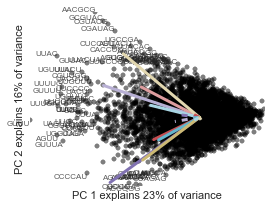

In [179]:


fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)

reduced_filtered = reduced[((reduced - reduced.mean()).abs() > 3*reduced.std()).any(axis=1)].dropna(how='all')

for kmer, row in reduced_filtered.iterrows():
    x = row[0]
    y = row[1]
    
    horizontalalignment = 'left' if x > 0 else 'right'
    verticalalignment = 'bottom' if y > 0 else 'top'
    ax.text(row[0], row[1], kmer, horizontalalignment=horizontalalignment, 
            verticalalignment=verticalalignment, fontsize=8, alpha=0.75)
components = pd.DataFrame(pca.components_, columns=study.supplemental.tier12_kmer_zscores.columns)


# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for tier, tier_df in components.groupby(study.supplemental.tier12_kmer_metadata['Tier'], axis=1):
    for direction, direction_df in tier_df.groupby(study.supplemental.tier12_kmer_metadata['direction'], axis=1):
        palette = reversed(sns.light_palette(direction_to_color[direction], n_colors=3))

        for color, (component, column) in zip(palette, direction_df.iteritems()):
#             print tier, direction, component
            linestyle = '-' if tier == 'Tier 1' else 'dashed'
            labels.append(component)
            ax.plot([0, column[0]], [0, column[1]], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()
xmax, ymax = reduced.max()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
fig.savefig('{}/kmer_pca_points.pdf'.format(figure_folder))

for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))


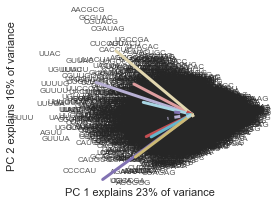

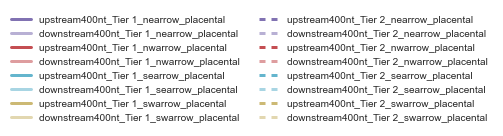

In [180]:


fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for kmer, row in reduced.iterrows():
    ax.text(row[0], row[1], kmer, horizontalalignment='center', 
            verticalalignment='center', fontsize=8, alpha=0.75)
components = pd.DataFrame(pca.components_, columns=study.supplemental.tier12_kmer_zscores.columns)


# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for tier, tier_df in components.groupby(study.supplemental.tier12_kmer_metadata['Tier'], axis=1):
    for direction, direction_df in tier_df.groupby(study.supplemental.tier12_kmer_metadata['direction'], axis=1):
        palette = reversed(sns.light_palette(direction_to_color[direction], n_colors=3))

        for color, (component, column) in zip(palette, direction_df.iteritems()):
#             print tier, direction, component
            linestyle = '-' if tier == 'Tier 1' else 'dashed'
            labels.append(component)
            ax.plot([0, column[0]], [0, column[1]], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()
xmax, ymax = reduced.max()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
fig.savefig('{}/kmer_pca.pdf'.format(figure_folder))

for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))

legend_fig, legend_ax = plt.subplots(figsize=(7, 2))
legend_ax.legend(ax.lines, labels, ncol=2);
sns.despine(bottom=True, left=True)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_pca_legend.pdf'.format(figure_folder))


In [184]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='kmers',
                    marker=dict(size=10, opacity=0.5, color='black'), text=reduced.index.tolist())

lines = []

for tier, tier_df in components.groupby(study.supplemental.tier12_kmer_metadata['Tier'], axis=1):
    linestyle = 'solid' if tier == 'Tier 1' else 'dot'
    for direction, direction_df in tier_df.groupby(study.supplemental.tier12_kmer_metadata['direction'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(direction_to_color[direction], n_colors=3)))

        for color, (component, column) in zip(palette, direction_df.iteritems()):
            x = [0, column[0]]
            y = [0, column[1]]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
            
plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='K-mer enrichment in Tier1 and 2 changing events',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='changing-events-tier12-kmer-enrichment')

In [165]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/tier1_tier2_comparison/kmers'

In [14]:
# sns.clustermap(study.supplemental.tier12_kmer_zscores, col_colors=intron_colors, metric='cosine')

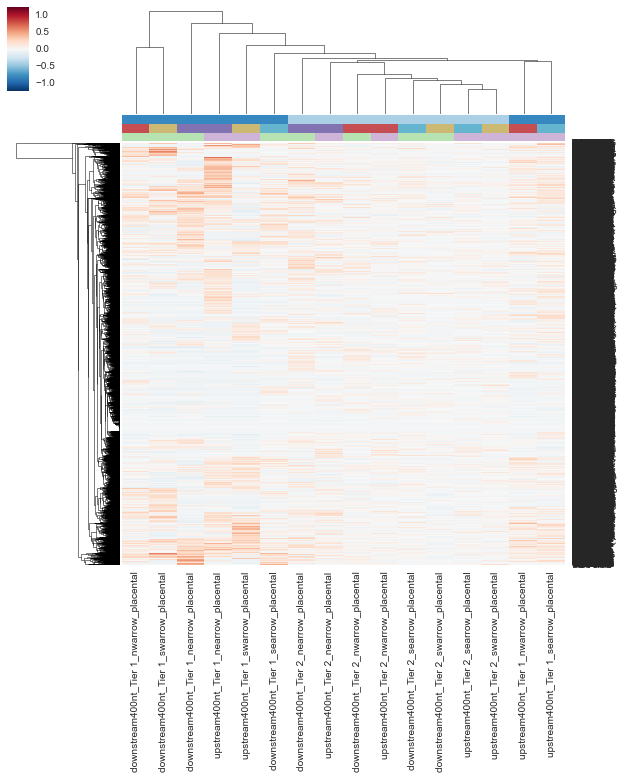

In [15]:
sns.clustermap(study.supplemental.tier12_kmer_zscores, col_colors=intron_colors, metric='chebyshev')

In [17]:
# sns.clustermap(study.supplemental.tier12_kmer_zscores, 
#                col_colors=intron_colors, metric='jaccard')

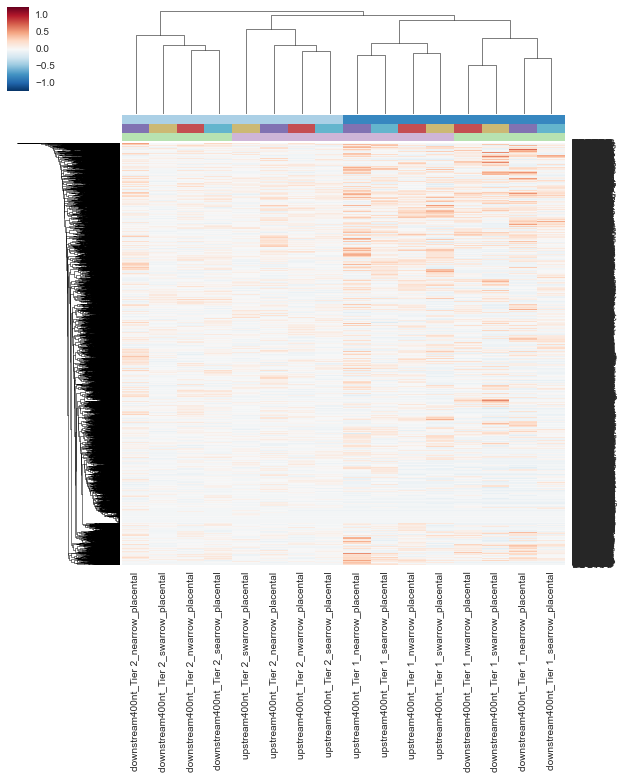

In [21]:
sns.clustermap(study.supplemental.tier12_kmer_zscores, col_linkage=pearson_clustergrid.dendrogram_col.linkage,
               col_colors=intron_colors, metric='mahalanobis', row_)

### Make PCL for java tree view

In [23]:
def make_pcl(data):
    pcl = data.copy()
    pcl['GWEIGHT'] = 1
    pcl['NAME'] = pcl.index
    pcl.loc['EWEIGHT'] = 1
    pcl = pcl.reindex(columns=['NAME', "GWEIGHT"] + data.columns.tolist(),
                      index=['EWEIGHT'] + data.index.tolist())
    pcl.index.name = 'CLID'
    pcl.loc['EWEIGHT', ['NAME', 'GWEIGHT']] = np.nan
    return pcl
pcl = make_pcl(study.supplemental.tier12_kmer_zscores)
pcl.to_csv('{}/kmer_zscores.pcl'.format(figure_folder), sep='\t')

### Match kmers to known motifs

In [113]:
kmer_folder = '{}/kmers'.format(figure_folder)
! mkdir $kmer_folder

In [114]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

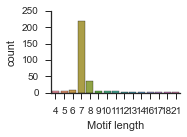

In [115]:
sns.set(style='ticks')
s = cisbp_motifs.map(len)
s.name = 'Motif length'
s = s.reset_index()
# s =
order = sorted(s['Motif length'].unique())
g = sns.factorplot(data=s, kind='count', x="Motif length", order=order, size=2, aspect=1.25)
g.savefig('{}/cisbp_motif_sizes.pdf'.format(figure_folder))

In [116]:
cisbp_motifs_inf = cisbp_motifs.map(lambda x: x[x > 0.01])
cisbp_motifs_inf = cisbp_motifs_inf.map(lambda x: x.fillna(-np.inf))

In [117]:
kmer_lengths = 4, 5, 6
kmers = kvector.io.make_kmers(kmer_lengths, 'ACGT')
kmers_list = map(list, kmers)

In [118]:

def kmers_in_motif(pwm, kmers, vmin=0.01, threshold=0.5):
    """Generator to check if a kmer is exactly contained in a PWM

    This does not score kmers and PWMs, only checks if a kmer can 
    be exactly contained in a PWM with no mismatches, above a certain 
    threshold. Since most PWMs come with psuedocounts, the value 
    `vmin` is taken as the floor, and everything underneath will be 
    convered to -inf, so any 

    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    vmin : float
        Minimum value for a residue to have a valid value in a PWM

    """
    pwm[pwm <= vmin] = -np.inf
    
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)

        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer)) > 0
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(motif_length), kmer[start:(start+motif_length)]))/divisor > threshold for start in starts)
        else:
            # all that's left is: k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor > threshold for start in starts)
        yield score

from kvector.kmer import make_kmers

def motifs_to_kmer_bool(motifs, residues, kmer_lengths):
    kmers = make_kmers(kmer_lengths, residues)
    kmers_list = map(list, kmers)

    motif_scores = motifs.map(
        lambda x: pd.Series(kmers_in_motif(x, kmers_list), index=kmers))
    motif_scores = pd.DataFrame.from_records(motif_scores).T
    motif_scores.columns = motifs.index
    return motif_scores

In [119]:
# %time cisbp_kmers = motifs_to_kmer_bool(cisbp_motifs, 'ACGT', kmer_lengths)
# cisbp_kmers.head()

In [124]:
# cisbp_kmers.columns = cisbp_kmers.columns.map(lambda x: x.split()[0])
# cisbp_kmers.head()

In [128]:
# cisbp_kmers.to_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder))
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)

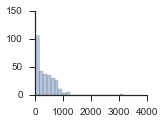

In [129]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=4)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax))
sns.despine()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [130]:

kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

M255_0.6_PUM1_ENSG00000134644_Homo_sapiens    3153
dtype: int64

In [131]:
kmer_means = study.supplemental.tier12_kmer_zscores.mean()

In [132]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


### Tttest over 0

(172, 16)


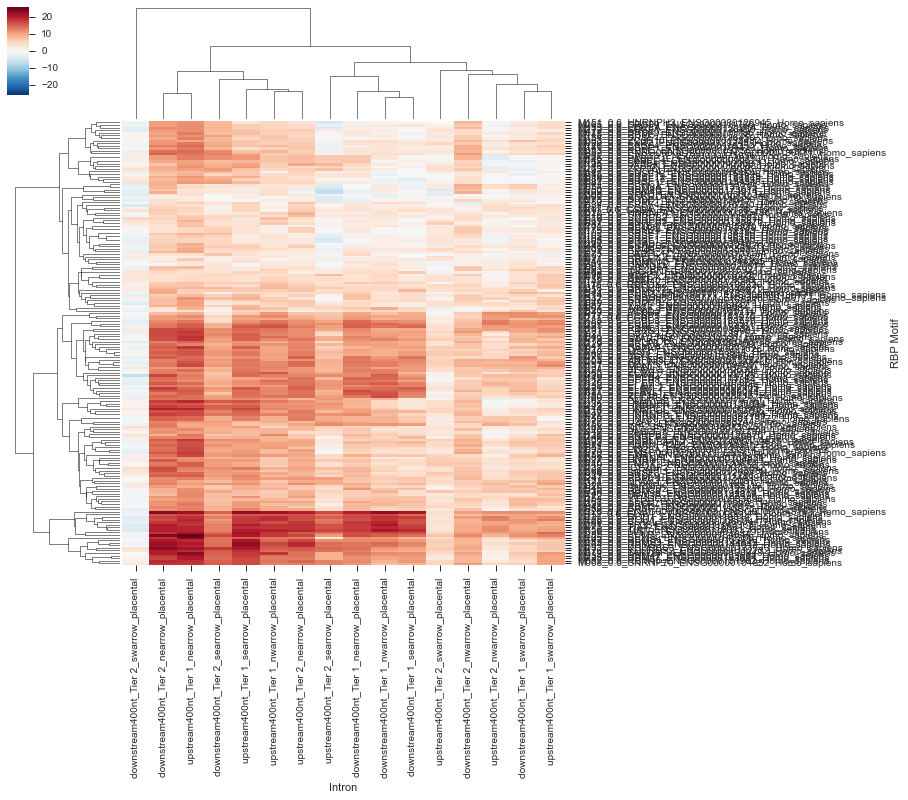

In [134]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
sns.clustermap(t_statistic_homo_sapiens)

### Try same thing but with t-test vs kmer mean instead of 0

In [135]:
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


In [136]:
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


In [137]:
cisbp_kmers_homo_sapiens = cisbp_kmers.loc[:, cisbp_metadata['Full Species'] == 'Homo sapiens']
cisbp_kmers_homo_sapiens.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,M017_0.6_RBFOX2_ENSG00000100320_Homo_sapiens,M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,M020_0.6_FXR2_ENSG00000129245_Homo_sapiens,M021_0.6_G3BP2_ENSG00000138757_Homo_sapiens,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,True,False,True,True,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,True,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,True,True,False,False


In [138]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers_homo_sapiens.iteritems():
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
# t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape


(172, 16)


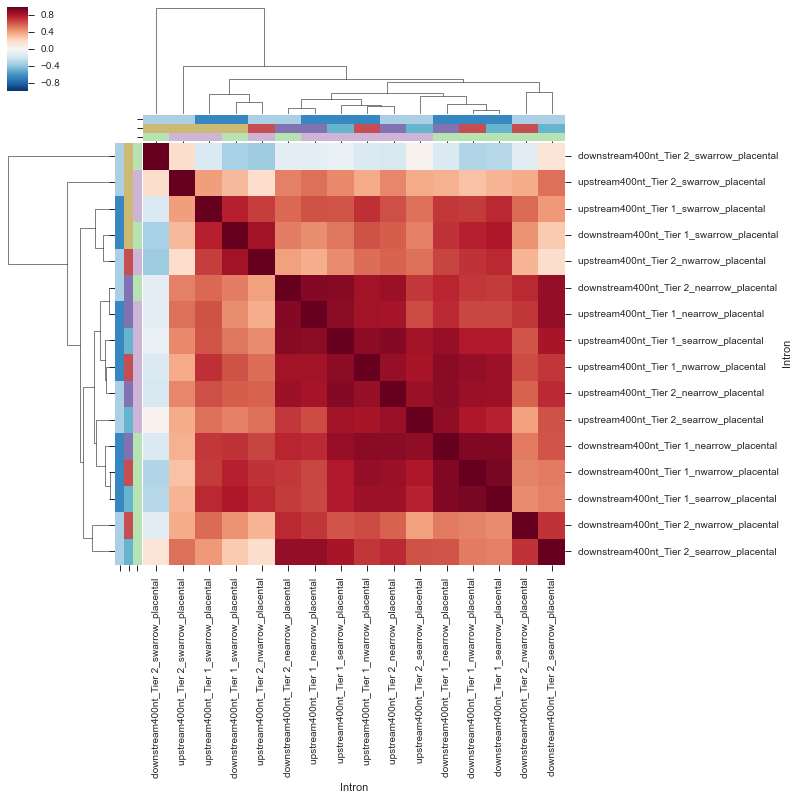

In [139]:
columns = t_statistic_homo_sapiens.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

g = sns.clustermap(t_statistic_homo_sapiens.corr(), col_colors=intron_colors, row_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_pearson_correlation_clustermap.pdf'.format(kmer_folder))

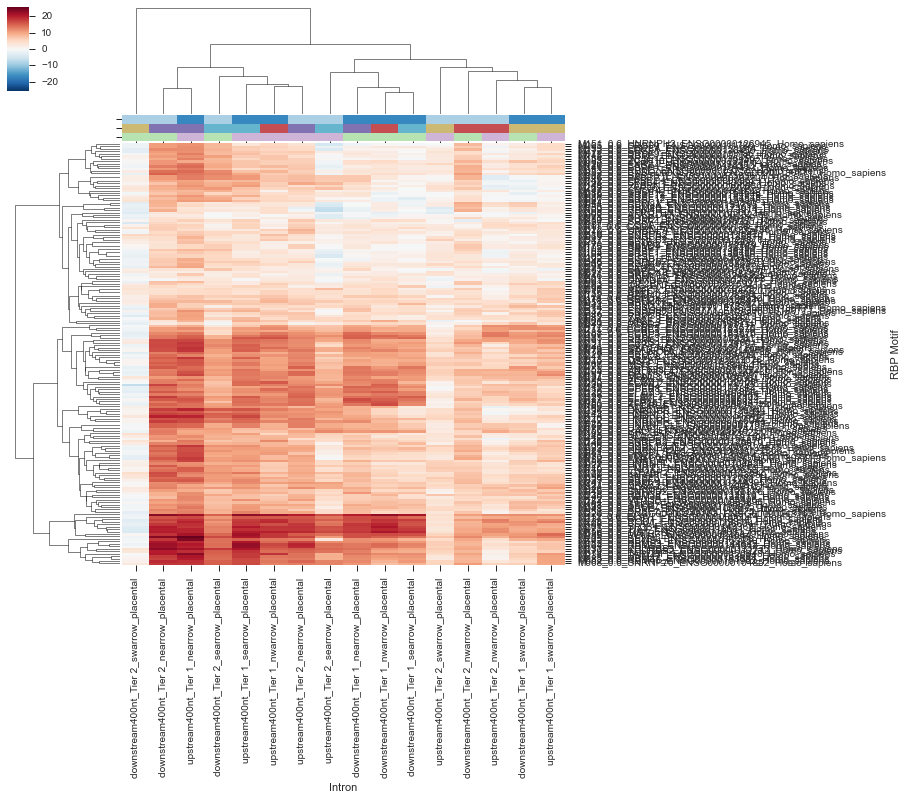

In [140]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_clustermap.pdf'.format(kmer_folder))

### PCA on t-statistic

In [185]:

data = t_statistic_homo_sapiens

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

(172, 2)


,component_0,component_1
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-8.347438,-7.794786
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-27.814566,-4.329490
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,15.875856,-4.518982
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,12.171188,-5.488763
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,8.479835,0.690968


In [186]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

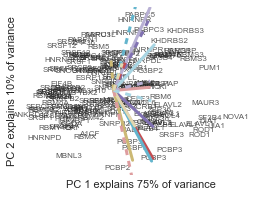

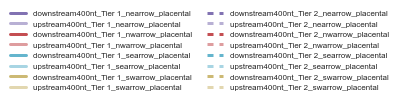

In [187]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', 
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

labels = []
for tier, tier_df in components.groupby(study.supplemental.tier12_kmer_metadata['Tier'], axis=1):
    for direction, direction_df in tier_df.groupby(study.supplemental.tier12_kmer_metadata['direction'], axis=1):
        palette = reversed(sns.light_palette(direction_to_color[direction], n_colors=3))

        for color, (component, column) in zip(palette, direction_df.iteritems()):
#             print tier, direction, component
            linestyle = '-' if tier == 'Tier 1' else 'dashed'
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)


xmin, ymin = reduced.min()
xmax, ymax = reduced.max()

ax.set(xlim=(xmin*1.1, xmax*1.2), ylim=(ymin*1.1, ymax*1.1))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))


for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))


legend_fig, legend_ax = plt.subplots(figsize=(5.5, 1.5))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=2, loc='center', fontsize=8);
sns.despine(bottom=True, left=True)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


### Plot CISBP Motif PCA with plotly

In [190]:
import plotly.plotly as py
import plotly.graph_objs as go

text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='kmers',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

for tier, tier_df in components.groupby(study.supplemental.tier12_kmer_metadata['Tier'], axis=1):
    linestyle = 'solid' if tier == 'Tier 1' else 'dot'
    for direction, direction_df in tier_df.groupby(study.supplemental.tier12_kmer_metadata['direction'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(direction_to_color[direction], n_colors=3)))

        for color, (component, column) in zip(palette, direction_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
            
plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Tier1 and 2 changing events motifs in kmers',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='changing-events-tier12-motifs-in-kmers')

In [188]:
components.apply(np.linalg.norm)

Intron
downstream400nt_Tier 1_nearrow_placental    0.357722
downstream400nt_Tier 1_nwarrow_placental    0.437775
downstream400nt_Tier 1_searrow_placental    0.438570
downstream400nt_Tier 1_swarrow_placental    0.343124
downstream400nt_Tier 2_nearrow_placental    0.450106
downstream400nt_Tier 2_nwarrow_placental    0.184635
downstream400nt_Tier 2_searrow_placental    0.456919
downstream400nt_Tier 2_swarrow_placental    0.137059
upstream400nt_Tier 1_nearrow_placental      0.469131
upstream400nt_Tier 1_nwarrow_placental      0.292752
upstream400nt_Tier 1_searrow_placental      0.387504
upstream400nt_Tier 1_swarrow_placental      0.232414
upstream400nt_Tier 2_nearrow_placental      0.301454
upstream400nt_Tier 2_nwarrow_placental      0.435229
upstream400nt_Tier 2_searrow_placental      0.311275
upstream400nt_Tier 2_swarrow_placental      0.137510
dtype: float64

In [143]:
# g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors, figsize=(4, 40))
# g.savefig('{}/cisbp_t_statistic_clustermap_tall.pdf'.format(kmer_folder))

In [220]:
# sns.pairplot(t_statistic_homo_sapiens)

In [221]:
kmer_cisbp_ttest_tidy_metadata = pd.concat([kmer_cisbp_ttest_tidy, kmer_cisbp_ttest_tidy['Intron'].str.split('_').apply(pd.Series)],
                                          axis=1)
kmer_cisbp_ttest_tidy_metadata = kmer_cisbp_ttest_tidy_metadata.rename(columns={0:'region', 1:'Tier', 2:'direction', 3:'clade'})
kmer_cisbp_ttest_tidy_metadata.head()

,Intron,RBP Motif,T-Statistic,$p$-value,region,Tier,direction,clade
0,upstream400nt_Tier 1_nearrow_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,5.441237,1.052836e-05,upstream400nt,Tier 1,nearrow,placental
1,upstream400nt_Tier 1_nearrow_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.737341,8.104574e-03,upstream400nt,Tier 1,nearrow,placental
2,upstream400nt_Tier 1_nearrow_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,5.335879,1.434891e-07,upstream400nt,Tier 1,nearrow,placental
3,upstream400nt_Tier 1_nearrow_placental,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,6.634379,1.089138e-09,upstream400nt,Tier 1,nearrow,placental
4,upstream400nt_Tier 1_nearrow_placental,M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,4.677440,3.697935e-06,upstream400nt,Tier 1,nearrow,placental


In [222]:
kmer_cisbp_ttest_tidy_metadata['$q$-value'] = kmer_cisbp_ttest_tidy_metadata.groupby('Intron', as_index=False, group_keys=False)\
    .apply(lambda x: x['$p$-value'] * x.shape[0])

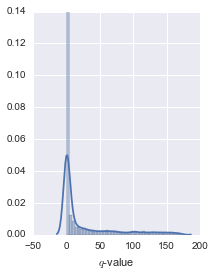

In [261]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.distplot(kmer_cisbp_ttest_tidy_metadata['$q$-value'])

In [224]:
kmer_cisbp_ttest_tidy_significant = kmer_cisbp_ttest_tidy_metadata.loc[kmer_cisbp_ttest_tidy_metadata['$q$-value'] < 1e-3]
kmer_cisbp_ttest_tidy_significant

,Intron,RBP Motif,T-Statistic,$p$-value,region,Tier,direction,clade,$q$-value
2,upstream400nt_Tier 1_nearrow_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,5.335879,1.434891e-07,upstream400nt,Tier 1,nearrow,placental,2.468013e-05
3,upstream400nt_Tier 1_nearrow_placental,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,6.634379,1.089138e-09,upstream400nt,Tier 1,nearrow,placental,1.873318e-07
4,upstream400nt_Tier 1_nearrow_placental,M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,4.677440,3.697935e-06,upstream400nt,Tier 1,nearrow,placental,6.360449e-04
7,upstream400nt_Tier 1_nearrow_placental,M019_0.6_SRSF12_ENSG00000154548_Homo_sapiens,5.086800,8.814940e-07,upstream400nt,Tier 1,nearrow,placental,1.516170e-04
13,upstream400nt_Tier 1_nearrow_placental,M025_0.6_HNRNPC_ENSG00000092199_Homo_sapiens,11.384909,3.425106e-10,upstream400nt,Tier 1,nearrow,placental,5.891183e-08
16,upstream400nt_Tier 1_nearrow_placental,M031_0.6_ELAVL1_ENSG00000066044_Homo_sapiens,10.015746,4.698753e-17,upstream400nt,Tier 1,nearrow,placental,8.081855e-15
18,upstream400nt_Tier 1_nearrow_placental,M033_0.6_KHDRBS3_ENSG00000131773_Homo_sapiens,5.132502,3.385113e-07,upstream400nt,Tier 1,nearrow,placental,5.822395e-05
19,upstream400nt_Tier 1_nearrow_placental,M035_0.6_LIN28A_ENSG00000131914_Homo_sapiens,4.692621,3.321494e-06,upstream400nt,Tier 1,nearrow,placental,5.712969e-04
20,upstream400nt_Tier 1_nearrow_placental,M036_0.6_MATR3_ENSG00000015479_Homo_sapiens,7.970646,5.885120e-15,upstream400nt,Tier 1,nearrow,placental,1.012241e-12
21,upstream400nt_Tier 1_nearrow_placental,M037_0.6_MBNL3_ENSG00000076770_Homo_sapiens,5.486885,1.332132e-07,upstream400nt,Tier 1,nearrow,placental,2.291267e-05


In [225]:
tier1_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 1 and x['Tier'] == 'Tier 1')

In [245]:
both_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 2)
both_significant_2d = both_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
both_significant_2d = both_significant_2d.fillna(0)
both_significant_2d.shape

(68, 12)

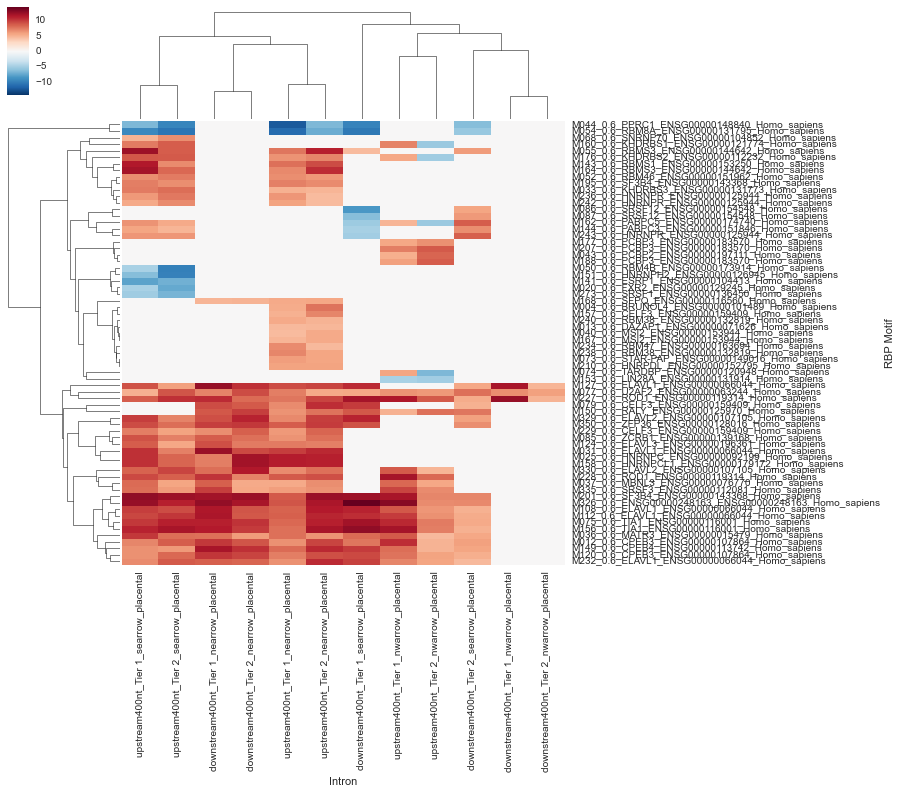

In [246]:
sns.clustermap(both_significant_2d)

In [254]:
tier1_significant_2d = tier1_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier1_significant_2d.isnull()

# Get the actual values for clustering
tier1_significant_2d = t_statistic_homo_sapiens.loc[tier1_significant_2d.index, :]
print tier1_significant_2d.shape
tier1_significant_2d.head()

(109, 16)


Intron,downstream400nt_Tier 1_nearrow_placental,downstream400nt_Tier 1_nwarrow_placental,downstream400nt_Tier 1_searrow_placental,downstream400nt_Tier 1_swarrow_placental,downstream400nt_Tier 2_nearrow_placental,downstream400nt_Tier 2_nwarrow_placental,downstream400nt_Tier 2_searrow_placental,downstream400nt_Tier 2_swarrow_placental,upstream400nt_Tier 1_nearrow_placental,upstream400nt_Tier 1_nwarrow_placental,upstream400nt_Tier 1_searrow_placental,upstream400nt_Tier 1_swarrow_placental,upstream400nt_Tier 2_nearrow_placental,upstream400nt_Tier 2_nwarrow_placental,upstream400nt_Tier 2_searrow_placental,upstream400nt_Tier 2_swarrow_placental
RBP Motif,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,4.635515,8.042128,3.883161,1.679208,1.624144,-2.013095,0.016308,-1.056446,5.441237,6.039410,6.305366,3.568150,2.819172,-0.059498,4.549991,-2.926656
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-4.715868,-5.139652,-1.624078,-1.237547,-2.096239,-0.583374,-3.628768,-1.263348,-2.737341,-4.306045,-1.960909,-2.627954,-1.791055,-2.367429,-6.224803,-0.751369
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,6.618785,7.061098,6.586448,2.755933,3.486516,2.621290,2.807341,-1.657877,5.335879,3.404730,4.874982,5.298481,7.922376,4.221983,4.513148,2.602193
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,10.192260,10.552812,7.739759,3.563334,9.166795,3.473973,5.971704,-1.825806,6.634379,10.659526,7.101056,1.875165,9.769106,5.048971,8.782711,-1.603681
M016_0.6_FMR1_ENSG00000102081_Homo_sapiens,-3.925882,-5.853878,-3.940260,-2.051729,-0.371578,-0.969032,1.942954,1.007663,1.169398,-4.523482,-2.938870,-3.822832,-0.469404,-2.243818,-2.408949,2.642313


In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, #mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap.pdf'.format(kmer_folder))

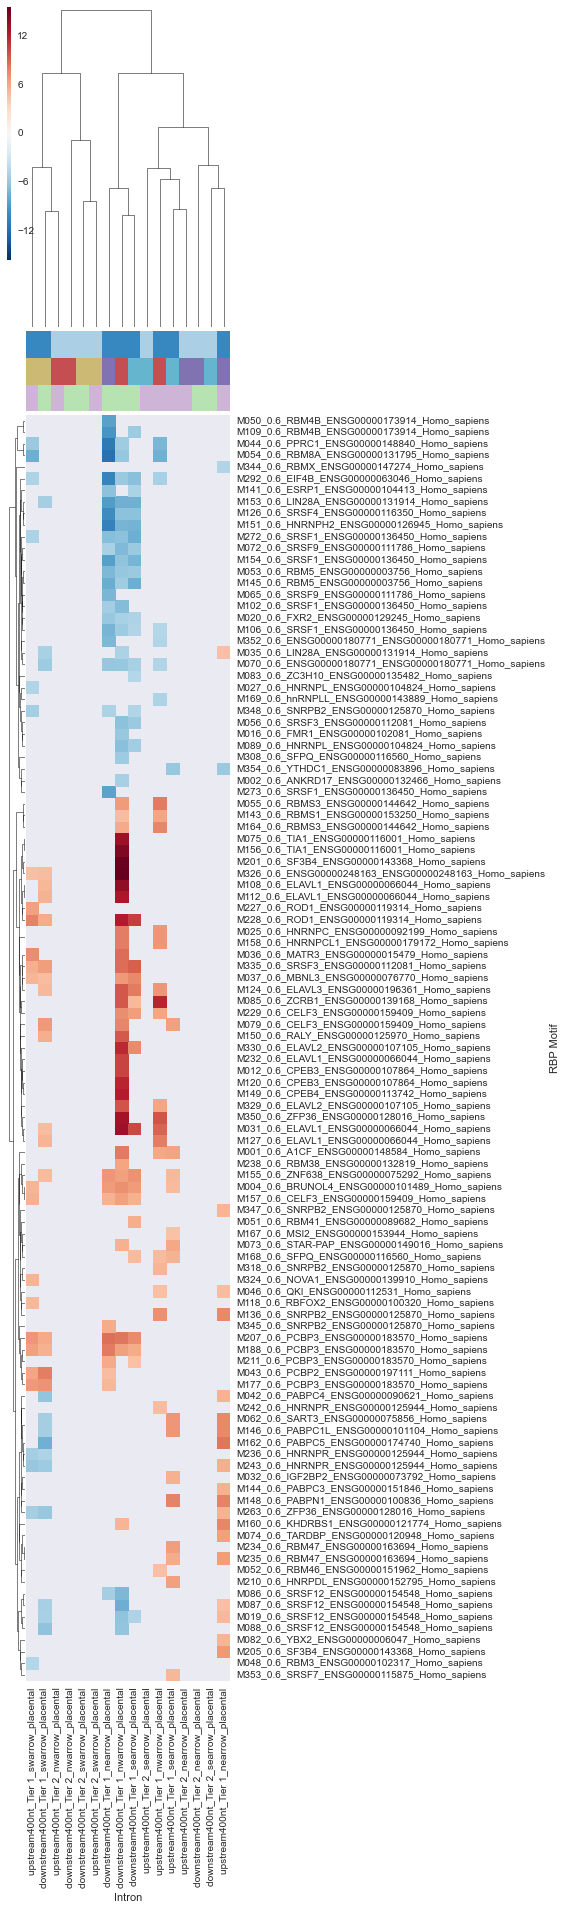

In [263]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap_masked.pdf'.format(kmer_folder))

In [252]:
tier2_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(
    lambda x: len(x) == 1 and x['Tier'] == 'Tier 2')
tier2_significant_2d = tier2_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier2_significant_2d.isnull()

# Get the actual values for clustering
tier2_significant_2d = t_statistic_homo_sapiens.loc[tier2_significant_2d.index, :]
print tier2_significant_2d.shape
tier2_significant_2d.head()

(75, 16)


Intron,downstream400nt_Tier 1_nearrow_placental,downstream400nt_Tier 1_nwarrow_placental,downstream400nt_Tier 1_searrow_placental,downstream400nt_Tier 1_swarrow_placental,downstream400nt_Tier 2_nearrow_placental,downstream400nt_Tier 2_nwarrow_placental,downstream400nt_Tier 2_searrow_placental,downstream400nt_Tier 2_swarrow_placental,upstream400nt_Tier 1_nearrow_placental,upstream400nt_Tier 1_nwarrow_placental,upstream400nt_Tier 1_searrow_placental,upstream400nt_Tier 1_swarrow_placental,upstream400nt_Tier 2_nearrow_placental,upstream400nt_Tier 2_nwarrow_placental,upstream400nt_Tier 2_searrow_placental,upstream400nt_Tier 2_swarrow_placental
RBP Motif,,,,,,,,,,,,,,,,
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-4.715868,-5.139652,-1.624078,-1.237547,-2.096239,-0.583374,-3.628768,-1.263348,-2.737341,-4.306045,-1.960909,-2.627954,-1.791055,-2.367429,-6.224803,-0.751369
M021_0.6_G3BP2_ENSG00000138757_Homo_sapiens,0.910364,1.645854,2.213203,-0.685188,4.179696,0.981265,3.812126,-0.742107,4.375566,2.064870,4.300731,-0.654496,2.842958,-4.770422,-1.161762,0.408409
M022_0.6_HNRNPA1_ENSG00000135486_Homo_sapiens,-0.071904,2.391673,-0.051284,1.896654,3.042762,1.627330,0.419953,0.469561,0.437193,3.553003,-0.342317,0.771286,6.604003,-0.633891,0.877328,1.631278
M024_0.6_HNRNPA2B1_ENSG00000122566_Homo_sapiens,-4.548213,-3.348704,-2.178219,-1.935236,0.540645,1.065069,1.251238,0.176936,0.709744,-1.924019,-2.481932,-3.503439,-0.500577,-2.777094,-5.463938,0.339146
M025_0.6_HNRNPC_ENSG00000092199_Homo_sapiens,7.411151,7.957526,5.691723,5.315741,12.221389,5.021812,7.750175,-0.300169,11.384909,6.899830,10.607619,-1.081591,11.223219,6.013377,8.485092,1.440993


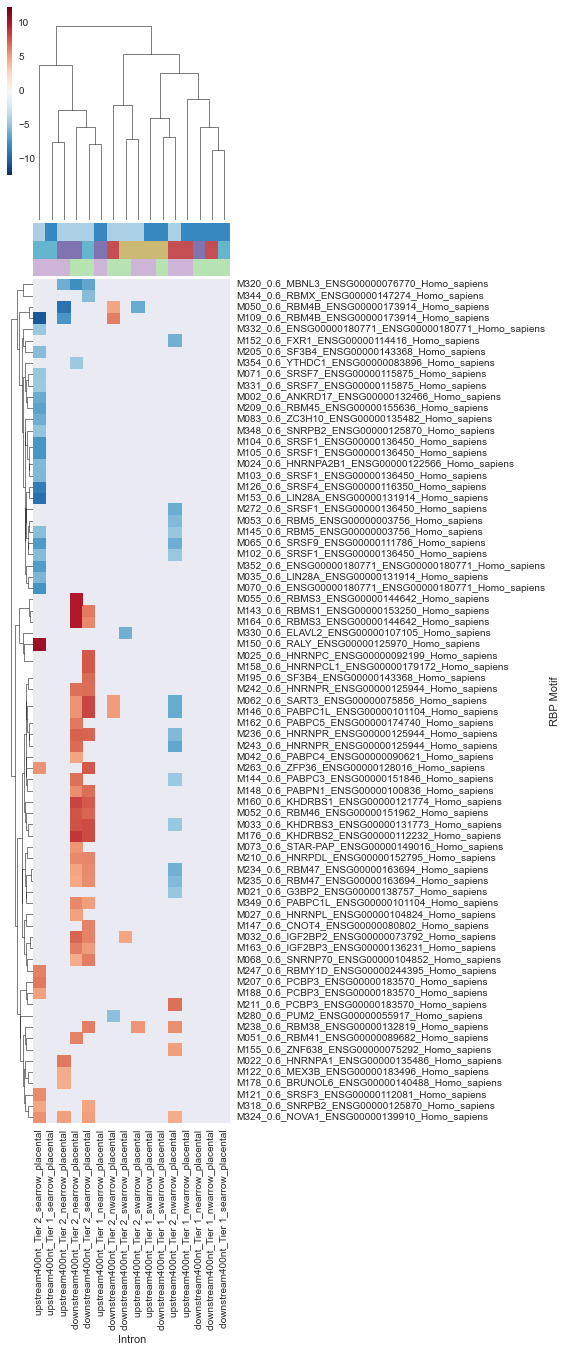

In [253]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))

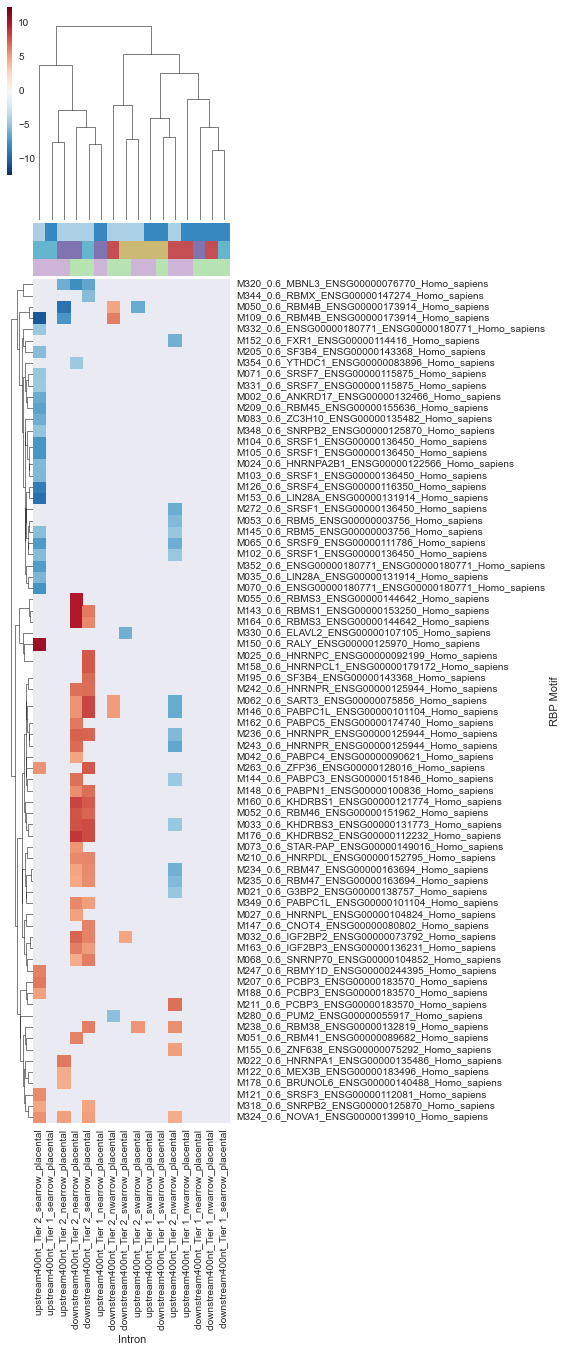

In [242]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))